In [1]:
# This program generates FIG.6A
#Rates trace plots

#Different effects on oscillations depending on the layer in which plasticity of
#excitatory-to-excitatory synapses is enabled.

In [2]:
#Fig 6A1: plasticity in all excitatory-to-excitatory connections. Firing rate profiles were obtained while L4 input
#was provided to half of the pyramidal cells in layer 4. 
#Fig 6A2: plasticity in connections between all layers except those from
#and to layer 4. 
#Fig 6A3: plasticity enabled only in synapses from layer 4 excitatory neurons. There was no plasticity in the
#connections going from layer 2/3,5,6 to the other layers.

In [3]:
#This porgrams generates also Fig 7A3 middle panel

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [5]:
#Importing some info I need for this program
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [6]:
#Folder where the spikes files are stored
a="../simulations_data/Cont/Spikes_files_30pA" #simulation with plasticity in all excitatory connections

In [7]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000


/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/3276246403.py:3: UserWarning: loadtxt: input contained no data: "../simulations_data/Cont/Spikes_files_30pA/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/3276246403.py:4: UserWarning: loadtxt: input contained no data: "../simulations_data/Cont/Spikes_files_30pA/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


In [8]:
#Ratster plot to check the simulation

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/1979703145.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


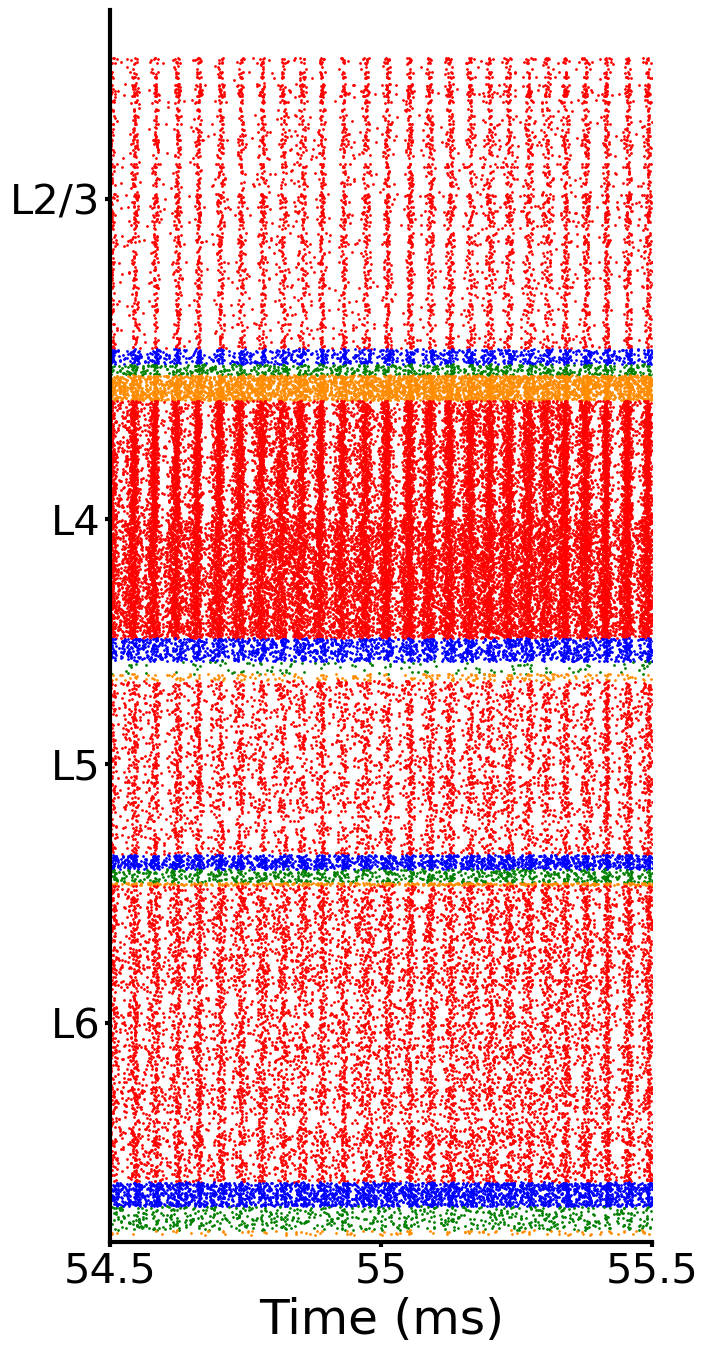

In [9]:
#Time of the simulation I am interested in looking at 
xmin=54.5*1000
xmax=55.5*1000

#Need this for the raster plot
Ntot=5000 #total number of neurons (rows) in the raster plot
N1=int(0.0192574218*Ntot) #Numbers of cells in each layer L1,L2/3,L4,L5
N2_3=int(0.291088453*Ntot)
N4=int(0.237625904*Ntot)
N5=int(0.17425693*Ntot)
N6= Ntot-N2_3-N4-N5

#FROM LAYER 2/3 TOP to LAYER 6 bottom of the plot
#I need the indexes to build the rows
i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
i_pv23=S_pv23i+ N[0][3]+N[0][2]
i_sst23=S_sst23i+ N[0][3]
i_vip23=S_vip23i

i_e4=S_e4i+ N[1][3]+N[1][2]+N[1][1]
i_pv4=S_pv4i+ N[1][3]+N[1][2]
i_sst4=S_sst4i+ N[1][3]
i_vip4=S_vip4i

i_e5=S_e5i+ N[2][3]+N[2][2]+N[2][1]
i_pv5=S_pv5i+ N[2][3]+N[2][2]
i_sst5=S_sst5i+ N[2][3]
i_vip5=S_vip5i

i_e6=S_e6i+ N[3][3]+N[3][2]+N[3][1]
i_pv6=S_pv6i+ N[3][3]+N[3][2]
i_sst6=S_sst6i+ N[3][3]
i_vip6=S_vip6i

#create the figure
f,ax= plt.subplots(figsize=(7,16))

#Layer 2/3
ax.plot(S_e23t,i_e23+N6+N5+N4,'.', markersize=2,color='r', label='E')
ax.plot(S_pv23t,i_pv23+N6+N5+N4,'.', markersize=2,color='b', label='PV')
ax.plot(S_sst23t,i_sst23+N6+N5+N4,'.', markersize=2,color='g', label='SST')
ax.plot(S_vip23t,i_vip23+N6+N5+N4,'.', markersize=2,color='darkorange', label='VIP')
#Layer 4
ax.plot(S_e4t,i_e4+N6+N5,'.', markersize=2,color='r')
ax.plot(S_pv4t,i_pv4+N6+N5,'.', markersize=2,color='b')
ax.plot(S_sst4t,i_sst4+N6+N5,'.', markersize=2,color='g')
ax.plot(S_vip4t,i_vip4+N6+N5,'.', markersize=2,color='darkorange')
#Layer 5
ax.plot(S_e5t,i_e5+N6,'.', markersize=2,color='r')
ax.plot(S_pv5t,i_pv5+N6,'.', markersize=2,color='b')
ax.plot(S_sst5t,i_sst5+N6,'.', markersize=2,color='g')
ax.plot(S_vip5t,i_vip5+N6,'.', markersize=2,color='darkorange')
#Layer 6
ax.plot(S_e6t,i_e6,'.', markersize=2,color='r')
ax.plot(S_pv6t,i_pv6,'.', markersize=2,color='b')
ax.plot(S_sst6t,i_sst6,'.', markersize=2,color='g')
ax.plot(S_vip6t,i_vip6,'.', markersize=2,color='darkorange')

ax.set_xlim(xmin,xmax) #I plot the desired part, defined above
plt.ylim(-30,5205)
#plt.legend(fontsize=19) #If you want to plot the standard legend


#Layout
plt.setp(ax.spines.values(), linewidth=3)
#Remove only 2 edges of the box
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#Ticks size and lables
plt.xticks(size=30)
plt.locator_params(axis='x', nbins=5) #How many ticks on x axis
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Time (ms)', size=35)
#plt.ylabel('neuron index', size=30)

#Create names of layers on the y-axis
lab = ('L6', 'L5',
               'L4', 'L2/3')
y_pos = [900,2000,3040,4400] #position where to put the labels
plt.yticks(y_pos, lab,size=28)
plt.yticks(size=30)
#If you don't want the label on y axis uncomment this
#ax.get_yaxis().set_visible(False)


#Legend (if you want it uncomment this)
# plt.legend(loc="upper left", markerscale=5., fontsize=23)
# l1= plt.legend(loc='upper center', bbox_to_anchor=(0.55, 1.08),
#           ncol=2, fancybox=True, markerscale=10, shadow=False, fontsize=25)
# l1.get_frame().set_linewidth(3.0)
# l1.get_frame().set_edgecolor('k')

# Add text


labels = [item.get_text() for item in ax.get_xticklabels()]
labels= ['54.5','55','55.5']
plt.locator_params(axis='x', nbins=2)
ax.set_xticklabels(labels)

plt.show()

In [10]:
#This is fig 7A3 middle panel

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/4266022772.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labs)


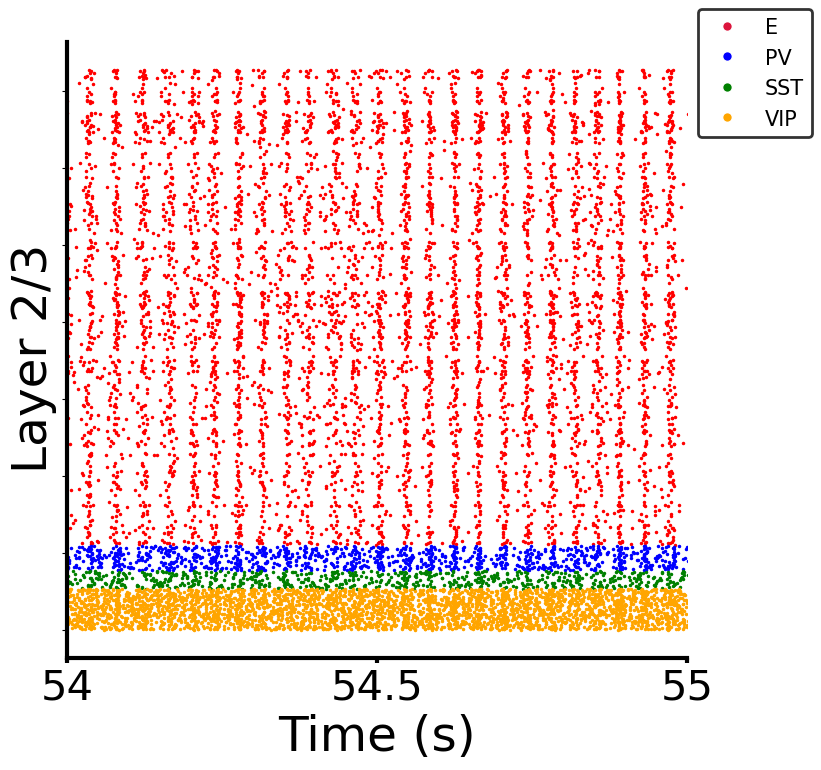

In [11]:
# Raster plot with only layer 2/3
#Time of the simulation I am interested in looking at 
xmin=54*1000
xmax=55*1000

#I need the indexes to build the rows
i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
i_pv23=S_pv23i+ N[0][3]+N[0][2]
i_sst23=S_sst23i+ N[0][3]
i_vip23=S_vip23i

#Create fig
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(S_e23t,i_e23,'.', markersize=3,color='r', label='e')
ax.plot(S_pv23t,i_pv23,'.', markersize=3,color='b', label='pv')
ax.plot(S_sst23t,i_sst23,'.', markersize=3,color='g', label='sst')
ax.plot(S_vip23t,i_vip23,'.', markersize=3,color='orange', label='vip')
ax.set_xlim(xmin,xmax)


#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

ax.set_xlabel('Time (s)', size=35)
ax.set_ylabel('Layer 2/3 ',fontsize=35)
plt.xticks(size=30)
ax.xaxis.set_tick_params(width=3)

#x axis labels
labs= ['54','54.5','55']
ax.set_xticklabels(labs)
plt.locator_params(axis='x', nbins=3)

ax.tick_params(top=False,
       bottom=True,
       left=True,
       right=False,
       labelleft=False,
       labelbottom=True)

#legend customized
legend_elements = [
                   Line2D([0], [0], marker='o', color='w', label='E',
                          markerfacecolor='crimson', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='PV',
                          markerfacecolor='blue', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='SST',
                          markerfacecolor='g', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='VIP',
                          markerfacecolor='orange', markersize=7)]
l1=plt.legend(handles=legend_elements,bbox_to_anchor=(1.0, 1.07), loc='upper left',fontsize=15)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

plt.savefig('../IMAGES/Fig7A3_raster_STDP_layer23.png')

plt.show()

In [12]:
#Function for computation of the firing rates from spikes
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000 #Initial time you want to start computing the rates from (of the total lenght of the simulation time)
    all_time=fin*1000 #Final time you want to finish to compute the rates
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append(spikes/window)
        time+=step_size
        spikes=0
    return rates  

In [17]:
#I compute the rates I need for the plot
#I already computed it and saved in folder 
#There is no need to run this, but this is how it was cmoputed and then saved
#CALL THE FUNCTION of rates
# iniz=54
# fin=55
# window=200
# step=1
# r_e23_s=rates(S_e23t,iniz,fin,window,step)
# r_e4_s=rates(S_e4t,iniz,fin,window,step)
# r_e5_s=rates(S_e5t,iniz,fin,window,step)
# r_e6_s=rates(S_e6t,iniz,fin,window,step)
# save_folder='plast_on/rate_200_1'
# np.save('../simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e23', r_e23_s)
# np.save('../simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e4', r_e4_s)
# np.save('../simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e5', r_e5_s)
# np.save('../simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e6', r_e6_s)

In [18]:
#TO UPLOAD THE COMPUTED RATES
saved_folder='plast_on/rate_200_1'

In [19]:
r_e23=np.load('../simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e23.npy')
r_e4=np.load('../simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e4.npy')
r_e5=np.load('../simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e5.npy')
r_e6=np.load('../simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e6.npy')
# r_pv23=np.load('../simulations_data/RATE_FILE_SAVED/oscill_30pA/rate_200_1/r_pv23.npy')
# r_sst23=np.load('../simulations_data/RATE_FILE_SAVED/oscill_30pA/rate_200_1/r_sst23.npy')
# r_vip23=np.load('../simulations_data/RATE_FILE_SAVED/oscill_30pA/rate_200_1/r_vip23.npy')

In [20]:
#Function to create a figure with Firing traces for excitatory neurons in all layers
def plot_trace(r_e23,r_e4,r_e5,r_e6):
    #Create the figure 
    fig , ax = plt.subplots(figsize=(12,10))
    #plot data 
    plt.plot(r_e23*1000/N[0][0],linewidth=6,color='black', label='E2/3')
    plt.plot(r_e4*1000/N[1][0],linewidth=6,color='crimson', label='E4')
    plt.plot(r_e5*1000/N[2][0],linewidth=6,color='orangered', label='E5')
    plt.plot(r_e6*1000/N[3][0],linewidth=6,color='pink', label='E6')

    #Layout
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.setp(ax.spines.values(), linewidth=3)

    ax.tick_params(axis="x", labelsize=45)
    ax.tick_params(axis="y", labelsize=45)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.set_ylabel('Rates (sp/s)',size=40)
    ax.set_xlabel('Time (s)', size=40)
    #plt.legend(loc='lower right',fontsize=15) #If you want standard legend
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=3)
    labs= ['0','54','54.5','55']
    ax.set_xticklabels(labs)

    #Legend customized
    legend_elements1 = [
               Patch(facecolor='darkred',alpha=1, edgecolor='k',
                     label='E2/3'),
                   Patch(facecolor='crimson',alpha=1, edgecolor='k',
                     label='E4'),
               Patch(facecolor='orangered',alpha=1, edgecolor='k',
                     label='E5'),
                Patch(facecolor='pink',alpha=1, edgecolor='k',
                     label='E6')]
    l1=plt.legend(handles=legend_elements1, loc='upper right', bbox_to_anchor=(1.3, 1.07),fontsize=35)
    l1.get_frame().set_linewidth(2.0)
    l1.get_frame().set_edgecolor('k')

In [21]:
#Fig. 6A first panel
#Firing rates traces at the end of the simulation with STDP.
#Plasticity in all excitatory-to-excitatory connections.

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/1050288263.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labs)


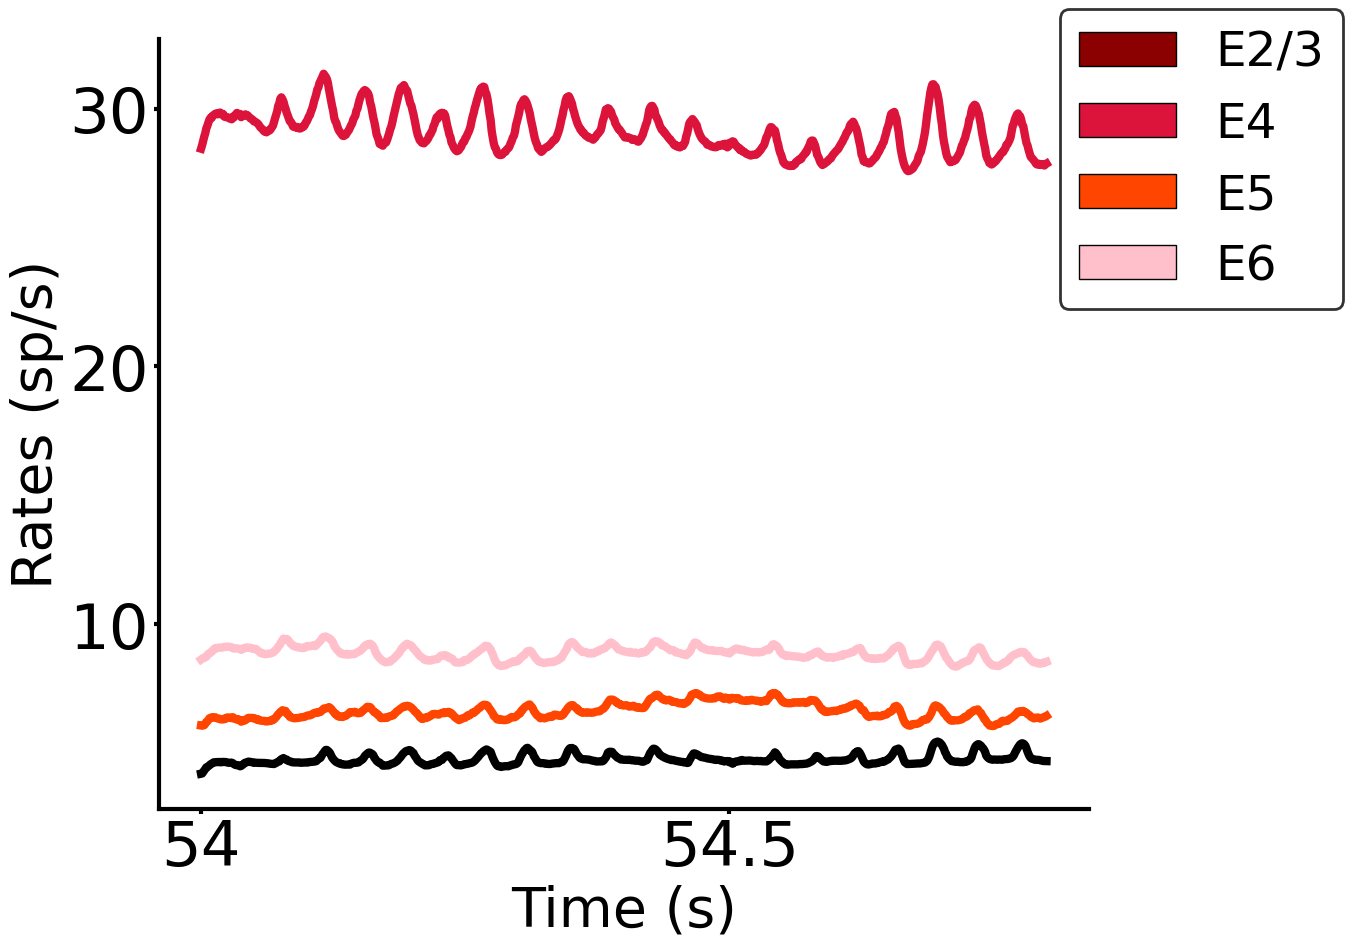

In [22]:
#Call the function to plot figure with rate traces
plot_trace(r_e23,r_e4,r_e5,r_e6)    
#Save and show fig
plt.savefig('../IMAGES/Fig6A1_rates_plasticity.png', bbox_inches='tight')
plt.show()

In [19]:
#Same for another simulation

In [23]:
#Folder where the spikes files are stored
a='../simulations_data/PLAST_off/Spikes_files_only4' #ONLY PLASTICITY FROM LAYER 4 IS PRESENT

In [24]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000


/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/3276246403.py:3: UserWarning: loadtxt: input contained no data: "../simulations_data/PLAST_off/Spikes_files_only4/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/3276246403.py:4: UserWarning: loadtxt: input contained no data: "../simulations_data/PLAST_off/Spikes_files_only4/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


In [22]:
#I compute the rates I need for the plot
#I already computed it and saved in folder 
#There is no need to run this, but this is how it was cmoputed and then saved
#CALL THE FUNCTION of rates
# iniz=54
# fin=55
# window=200
# step=1
# r_e23_s=rates(S_e23t,iniz,fin,window,step)
# r_e4_s=rates(S_e4t,iniz,fin,window,step)
# r_e5_s=rates(S_e5t,iniz,fin,window,step)
# r_e6_s=rates(S_e6t,iniz,fin,window,step)
# save_folder='only4'
# np.save('../simulations_data/RATE_FILE_SAVED/plast_off/'+save_folder+'/r_e23', r_e23_s)
# np.save('../simulations_data/RATE_FILE_SAVED/plast_off/'+save_folder+'/r_e4', r_e4_s)
# np.save('../simulations_data/RATE_FILE_SAVED/plast_off/'+save_folder+'/r_e5', r_e5_s)
# np.save('../simulations_data/RATE_FILE_SAVED/plast_off/'+save_folder+'/r_e6', r_e6_s)

In [23]:
#TO UPLOAD THE COMPUTED RATES from files

In [25]:
#Folder containing the info I need
saved_folder='only4'
r_e23=np.load('../simulations_data/RATE_FILE_SAVED/plast_off/'+saved_folder+'/r_e23.npy')
r_e4=np.load('../simulations_data/RATE_FILE_SAVED/plast_off/'+saved_folder+'/r_e4.npy')
r_e5=np.load('../simulations_data/RATE_FILE_SAVED/plast_off/'+saved_folder+'/r_e5.npy')
r_e6=np.load('../simulations_data/RATE_FILE_SAVED/plast_off/'+saved_folder+'/r_e6.npy')

In [26]:
#Fig. 6A3 (3rd panel)
#Firing rates traces at the end of the simulation with STDP
#where plasticity was only to and from excitatory connections in layer 4. (no self plasticity in layer 2/3,5,6 and between those)

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/1050288263.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labs)


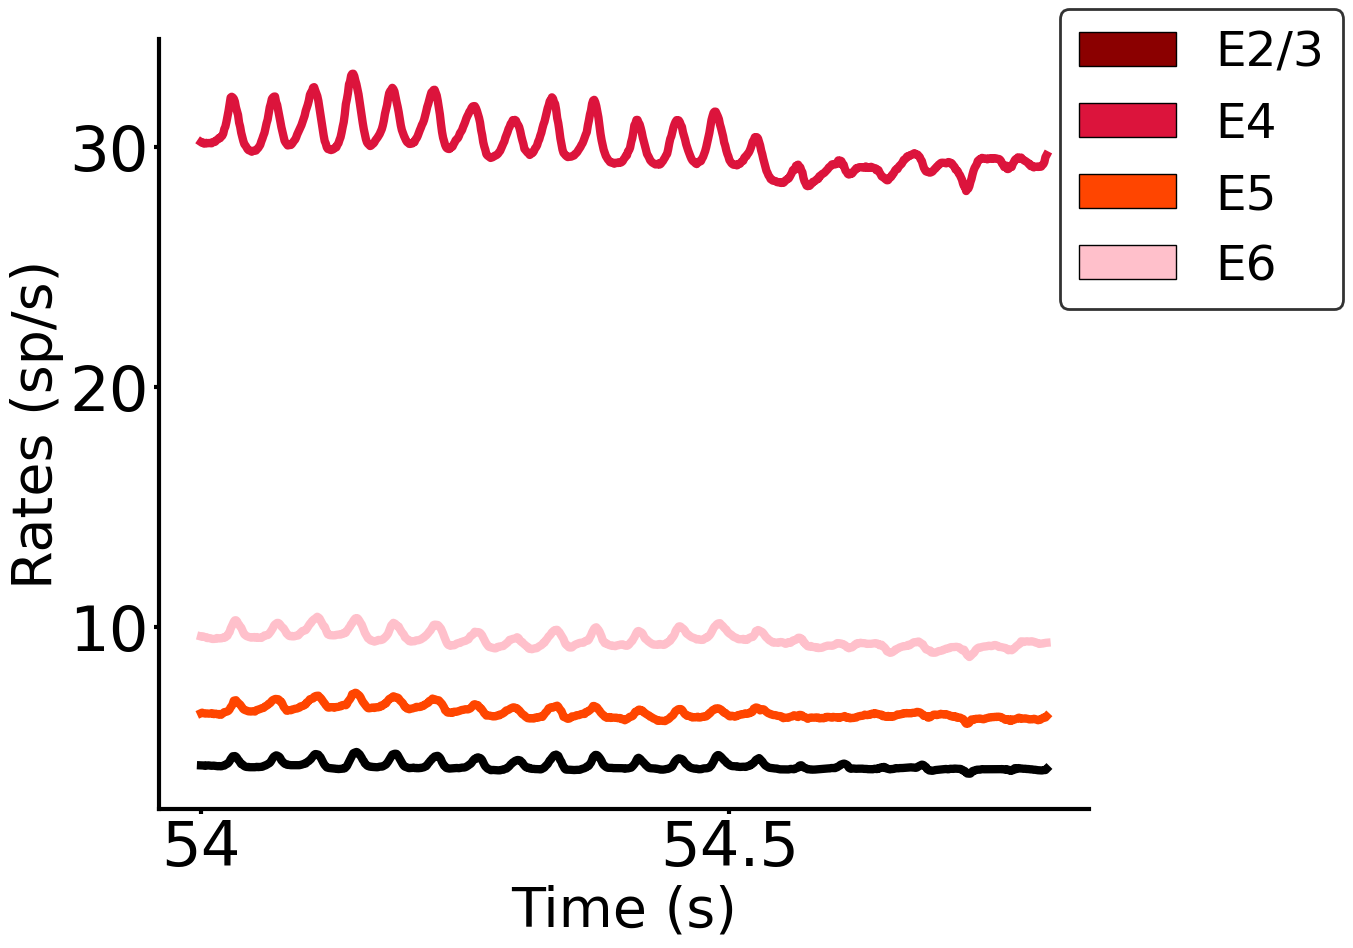

In [27]:
#Call the function to plot figure with rate traces
plot_trace(r_e23,r_e4,r_e5,r_e6)    
#Save and show fig
plt.savefig('../IMAGES/Fig6A3_rates_only4.png', bbox_inches='tight')
plt.show()

In [27]:
#Same for another simulation

In [28]:
#Folder where the spikes files are stored
a='../simulations_data/PLAST_off/Spikes_files_exctofrom4' #WHERE PLASTICITY IS "OFF' TO AND FROM LAYER 4

In [29]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/1509631370.py:3: UserWarning: loadtxt: input contained no data: "../simulations_data/PLAST_off/Spikes_files_exctofrom4/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/1509631370.py:4: UserWarning: loadtxt: input contained no data: "../simulations_data/PLAST_off/Spikes_files_exctofrom4/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


In [56]:
#I compute the rates I need for the plot
#I already computed it and saved in folder 
#There is no need to run this, but this is how it was cmoputed and then saved
#CALL THE FUNCTION of rates
# iniz=54
# fin=55
# window=200
# step=1
# r_e23_s=rates(S_e23t,iniz,fin,window,step)
# r_e4_s=rates(S_e4t,iniz,fin,window,step)
# r_e5_s=rates(S_e5t,iniz,fin,window,step)
# r_e6_s=rates(S_e6t,iniz,fin,window,step)
# save_folder='exctofrom4'
# np.save('../simulations_data/RATE_FILE_SAVED/plast_off/'+save_folder+'/r_e23', r_e23_s)
# np.save('../simulations_data/RATE_FILE_SAVED/plast_off/'+save_folder+'/r_e4', r_e4_s)
# np.save('../simulations_data/RATE_FILE_SAVED/plast_off/'+save_folder+'/r_e5', r_e5_s)
# np.save('../simulations_data/RATE_FILE_SAVED/plast_off/'+save_folder+'/r_e6', r_e6_s)

In [57]:
#TO UPLOAD THE COMPUTED RATES from files

In [30]:
#Folder containing the info I need  
saved_folder='exctofrom4'
r_e23=np.load('../simulations_data/RATE_FILE_SAVED/plast_off/'+saved_folder+'/r_e23.npy')
r_e4=np.load('../simulations_data/RATE_FILE_SAVED/plast_off/'+saved_folder+'/r_e4.npy')
r_e5=np.load('../simulations_data/RATE_FILE_SAVED/plast_off/'+saved_folder+'/r_e5.npy')
r_e6=np.load('../simulations_data/RATE_FILE_SAVED/plast_off/'+saved_folder+'/r_e6.npy')

In [31]:
#Fig. 6A2 (second panel)
#Firing rates traces at the end of the simulation with STDP.
#Plasticity is not in and from layer 4. 

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11421/1050288263.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labs)


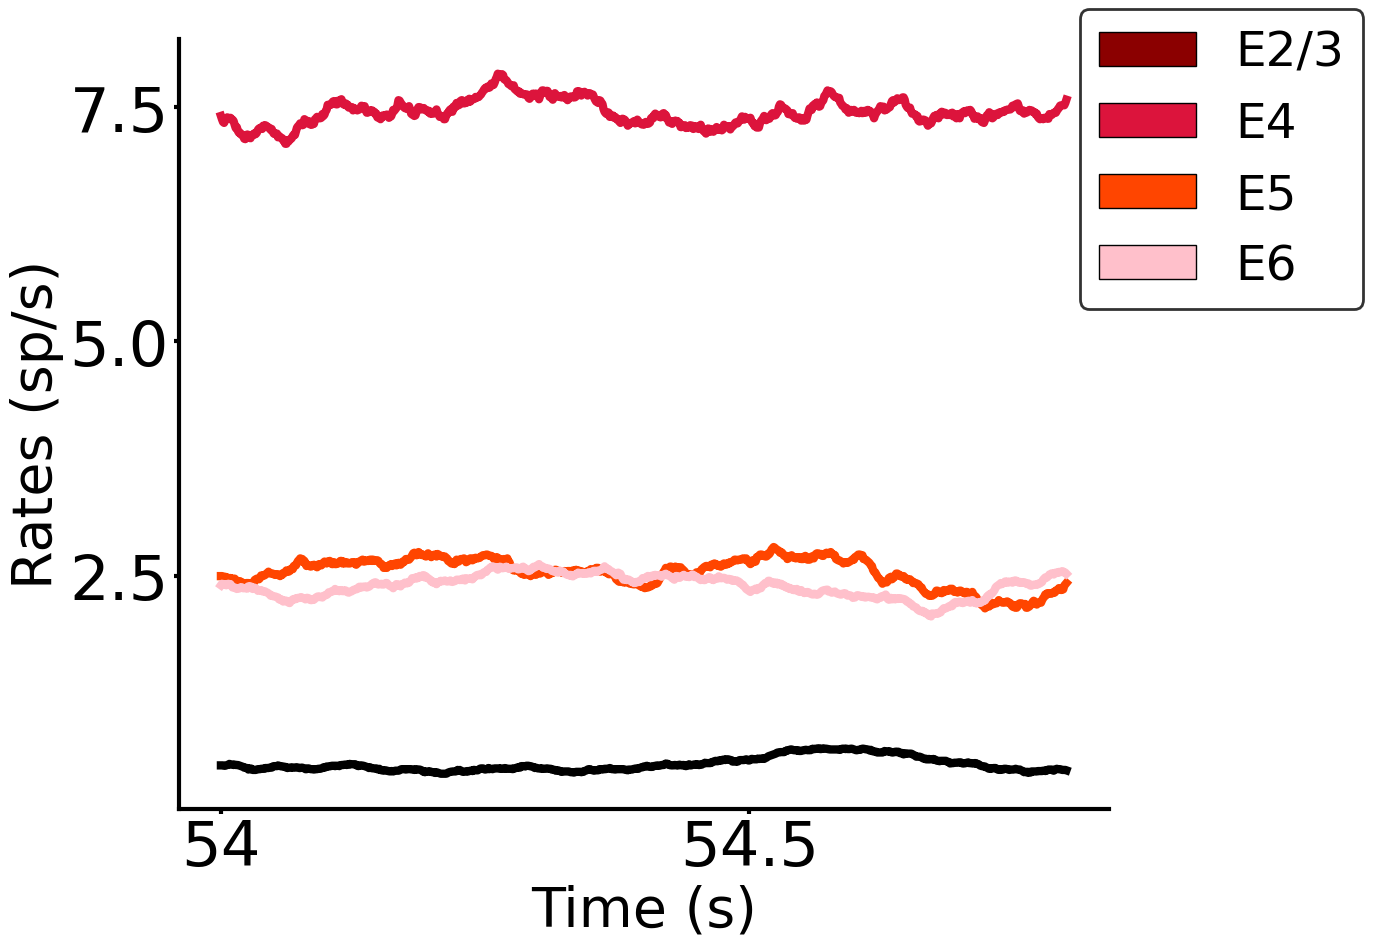

In [32]:
#Call the function to plot figure with rate traces
plot_trace(r_e23,r_e4,r_e5,r_e6)    
#Save and show fig
plt.savefig('../IMAGES/Fig6A2_rates_exctofrom4.png', bbox_inches='tight')
plt.show()